**Projet: Prédiction des Performances des Élèves**

1. Importation des bibliothèques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

2. Chargement du dataset

In [3]:
df = pd.read_csv('/content/sample_data/Student_performance_data _.csv')

3. Création de la variable cible (succès): 0 : Très faible, 1 : Moyenne, 2 : Élevée

In [4]:
def classify_grade(x):
    if x <= 1:
        return 0
    elif 2 <= x <= 3:
        return 1
    else:
        return 2
df['succès'] = df['GradeClass'].apply(classify_grade)

4. Analyse exploratoire

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  succès  
0             0  2.929196         2.0       1  
1 

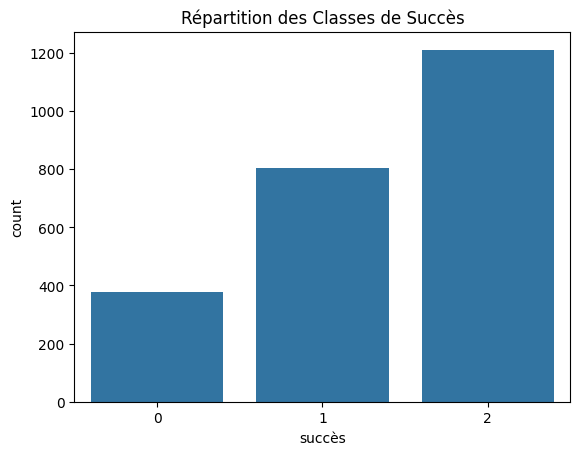

In [6]:
print(df.head())
print(df.describe())

sns.countplot(x='succès', data=df)
plt.title('Répartition des Classes de Succès')
plt.show()

5. Prétraitement

In [7]:
features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
X = df[features]
y = df['succès']

Normalisation

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

6. Séparation entraînement / test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

7. Modèle 1 : Régression Logistique

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

8. Évaluation

In [11]:
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8955431754874652
              precision    recall  f1-score   support

           0       0.93      0.65      0.77       113
           1       0.84      0.92      0.88       248
           2       0.93      0.96      0.94       357

    accuracy                           0.90       718
   macro avg       0.90      0.84      0.86       718
weighted avg       0.90      0.90      0.89       718



9. Modèle 2 : Random Forest

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.935933147632312
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       113
           1       0.95      0.92      0.93       248
           2       0.93      0.98      0.96       357

    accuracy                           0.94       718
   macro avg       0.93      0.91      0.92       718
weighted avg       0.94      0.94      0.94       718



In [13]:
print(df.columns)
print(df.head())



Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass', 'succès'],
      dtype='object')
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0    